In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:12<00:00, 155MB/s]
100% 1.06G/1.06G [00:12<00:00, 92.9MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.preprocessing import image
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [64]:
trainn=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256))
testt=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [65]:
def normalize_image(image, label):
  image = tf.cast(image, tf.float32) / 255.0
  return image, label
trainn=trainn.map(normalize_image)
testt=testt.map(normalize_image)

In [69]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [70]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [71]:
final = model.fit(trainn, epochs=10, validation_data=testt)

Epoch 1/10
625/625 [==============================] - 69s 107ms/step - loss: 1.1251 - accuracy: 0.5965 - val_loss: 1.2665 - val_accuracy: 0.5898
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.6158 - accuracy: 0.6696 - val_loss: 0.5719 - val_accuracy: 0.7228
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5185 - accuracy: 0.7384 - val_loss: 0.5804 - val_accuracy: 0.7000
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4529 - accuracy: 0.7813 - val_loss: 0.4849 - val_accuracy: 0.7506
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4032 - accuracy: 0.8081 - val_loss: 0.7205 - val_accuracy: 0.6862
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3509 - accuracy: 0.8343 - val_loss: 0.5272 - val_accuracy: 0.7796
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3058 - accuracy: 0.8547 - val_loss: 0.4439 - val_ac

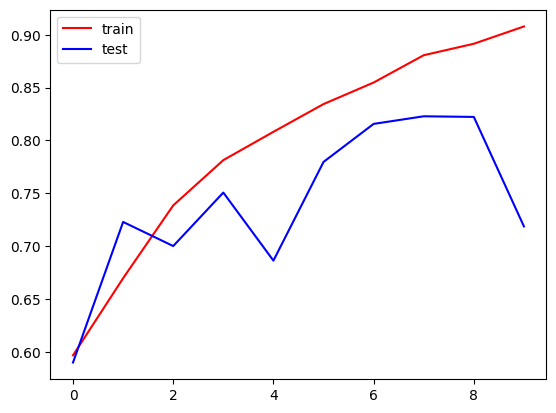

In [72]:
import matplotlib.pyplot as plt

plt.plot(final.history['accuracy'],color='red',label='train')
plt.plot(final.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

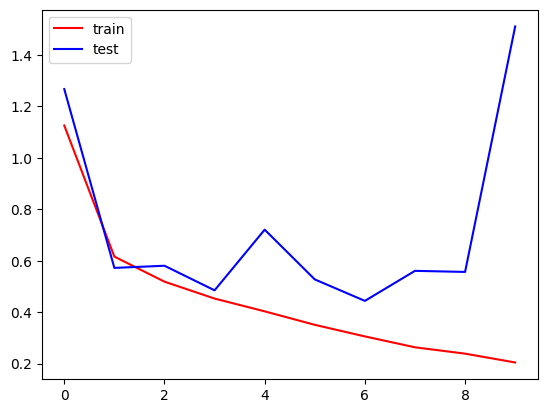

In [73]:
plt.plot(final.history['loss'],color='red',label='train')
plt.plot(final.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [57]:
import cv2


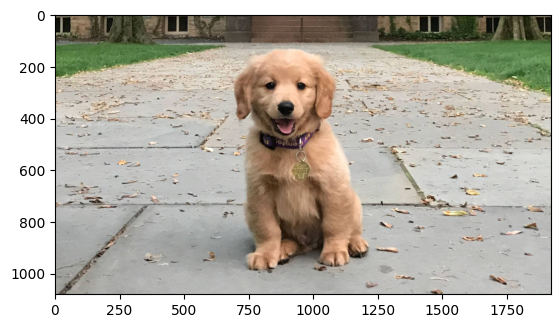

In [85]:
test_img = cv2.imread('/content/dog1.jpg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

test_img = cv2.resize(test_img, (256, 256))
test_img = test_img.astype(np.float32) / 255.0  # Normalize the image
test_img = np.expand_dims(test_img, axis=0)

In [86]:
prediction = model.predict(test_img)

1/1 [==============================] - 0s 20ms/step


In [87]:
if prediction[0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

It's a dog!


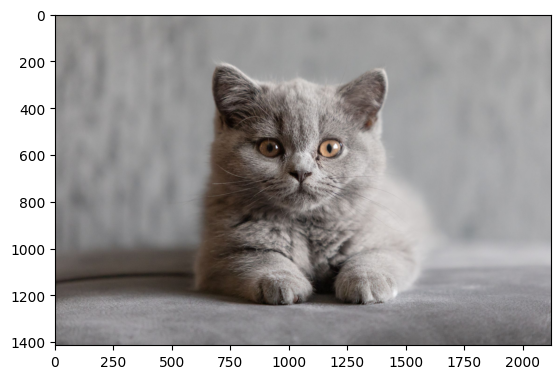

In [91]:
test_img1 = cv2.imread('/content/catt.jpg')
plt.imshow(cv2.cvtColor(test_img1, cv2.COLOR_BGR2RGB))
plt.show()

test_img1 = cv2.resize(test_img1, (256, 256))
test_img1 = test_img1.astype(np.float32) / 255.0  # Normalize the image
test_img1 = np.expand_dims(test_img1, axis=0)



In [94]:
prediction=model.predict(test_img1)
if prediction[0]>0.5:
  print("It's a dog")
else:
  print("It's a cat")

1/1 [==============================] - 0s 59ms/step
It's a cat
